In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm

In [2]:
rb_df2 = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG00358/HG00358_rbDF2_Kmode.csv").set_index("Alu")
rb_df2

,RepeatBlock,Lengths,Group,Block_Size,KMode_cluster
Alu,,,,,
C_AluY_27648628-27648919,0,2217,['42438 373 24.1 3.6 3.7 chrY.01-24.01.PAR1-PA...,2000-2999,#FF033E
C_AluY_27651050-27651338,0,2411,['42441 411 24.3 3.9 3.7 chrY.01-24.01.PAR1-PA...,2000-2999,#FF033E
C_AluY_27653465-27653756,0,2411,['42444 407 24.3 3.9 3.8 chrY.01-24.01.PAR1-PA...,2000-2999,#FF033E
C_AluY_27655874-27656161,0,2402,['42447 379 26.9 2.9 3.9 chrY.01-24.01.PAR1-PA...,2000-2999,#FF033E
C_AluY_27658288-27658576,0,2404,['42450 358 20.7 8.6 3.0 chrY.01-24.01.PAR1-PA...,2000-2999,#FF033E
...,...,...,...,...,...
+_AluSx_58564972-58565300,41,551,['67980 2114 13.0 0.7 0.0 chrY.01-24.01.PAR1-P...,<999,GraveYard
+_AluJb_58566428-58566578,41,1012,['67982 18 21.8 0.0 0.0 chrY.01-24.01.PAR1-PAR...,1000-1999,GraveYard
+_AluSp_58566579-58566876,41,298,['67984 2101 12.8 0.7 0.3 chrY.01-24.01.PAR1-P...,<999,GraveYard


In [3]:
import ast
AluCoordinateDict={}
for row in rb_df2.index:
    AluCoordinateDict[str(ast.literal_eval(rb_df2.at[row,'Group'])[-1].split(" ")[5].split(".utig4-2510.")[1])+":"+str(ast.literal_eval(rb_df2.at[row,'Group'])[0].split(" ")[6])+"-"+str(ast.literal_eval(rb_df2.at[row,'Group'])[-1].split(" ")[7])]= row

In [4]:
AluCoordinateDict

{'HG00358:27647271-27649487': 'C_AluY_27648628-27648919',
 'HG00358:27649495-27651905': 'C_AluY_27651050-27651338',
 'HG00358:27651913-27654323': 'C_AluY_27653465-27653756',
 'HG00358:27654331-27656732': 'C_AluY_27655874-27656161',
 'HG00358:27656740-27659143': 'C_AluY_27658288-27658576',
 'HG00358:27659144-27661561': 'C_AluY_27660704-27660994',
 'HG00358:27661569-27663977': 'C_AluY_27663119-27663406',
 'HG00358:27663986-27667389': 'C_AluY_27665535-27665797',
 'HG00358:27667403-27669800': '+_AluY_27667964-27668255',
 'HG00358:27669808-27672213': '+_AluY_27670375-27670666',
 'HG00358:27672221-27674619': '+_AluY_27672788-27673079',
 'HG00358:27674638-27677045': '+_AluY_27675205-27675497',
 'HG00358:27677053-27679442': '+_AluY_27677619-27677911',
 'HG00358:27679450-27681004': '+_AluY_27680017-27680308',
 'HG00358:28134346-28136758': '+_AluY_28134913-28135204',
 'HG00358:28136766-28139176': '+_AluY_28137333-28137624',
 'HG00358:28139184-28141595': '+_AluY_28139751-28140042',
 'HG00358:2814

In [5]:
AluDict = {x:'temp' for x in rb_df2.index}
for alu in AluDict:
    if  rb_df2.loc[alu]['KMode_cluster'] == 'GraveYard':
        AluDict[alu]='black'
    else:
        AluDict[alu]= rb_df2.loc[alu]['KMode_cluster']

AluDict

{'C_AluY_27648628-27648919': '#FF033E',
 'C_AluY_27651050-27651338': '#FF033E',
 'C_AluY_27653465-27653756': '#FF033E',
 'C_AluY_27655874-27656161': '#FF033E',
 'C_AluY_27658288-27658576': '#FF033E',
 'C_AluY_27660704-27660994': '#FF033E',
 'C_AluY_27663119-27663406': '#FF033E',
 'C_AluY_27665535-27665797': '#FF033E',
 '+_AluY_27667964-27668255': '#FF033E',
 '+_AluY_27670375-27670666': '#FF033E',
 '+_AluY_27672788-27673079': '#FF033E',
 '+_AluY_27675205-27675497': '#FF033E',
 '+_AluY_27677619-27677911': '#FF033E',
 '+_AluY_27680017-27680308': '#FF033E',
 '+_AluY_28134913-28135204': '#FF033E',
 '+_AluY_28137333-28137624': '#FF033E',
 '+_AluY_28139751-28140042': '#228B22',
 '+_AluY_28142170-28142461': '#228B22',
 '+_AluY_28144590-28144880': '#FF033E',
 '+_AluY_28147009-28147300': '#228B22',
 '+_AluY_28149429-28149720': '#228B22',
 '+_AluY_28151860-28152151': '#FF033E',
 '+_AluY_28154278-28154569': '#FF033E',
 '+_AluY_28156696-28156987': '#FF033E',
 '+_AluY_28159114-28159405': '#FF033E',


In [6]:
AluDict2={}
for x,y in AluDict.items():
    if y == 'black':
        continue
    else:
        AluDict2[x]=0.0

In [7]:
AluDict2

{'C_AluY_27648628-27648919': 0.0,
 'C_AluY_27651050-27651338': 0.0,
 'C_AluY_27653465-27653756': 0.0,
 'C_AluY_27655874-27656161': 0.0,
 'C_AluY_27658288-27658576': 0.0,
 'C_AluY_27660704-27660994': 0.0,
 'C_AluY_27663119-27663406': 0.0,
 'C_AluY_27665535-27665797': 0.0,
 '+_AluY_27667964-27668255': 0.0,
 '+_AluY_27670375-27670666': 0.0,
 '+_AluY_27672788-27673079': 0.0,
 '+_AluY_27675205-27675497': 0.0,
 '+_AluY_27677619-27677911': 0.0,
 '+_AluY_27680017-27680308': 0.0,
 '+_AluY_28134913-28135204': 0.0,
 '+_AluY_28137333-28137624': 0.0,
 '+_AluY_28139751-28140042': 0.0,
 '+_AluY_28142170-28142461': 0.0,
 '+_AluY_28144590-28144880': 0.0,
 '+_AluY_28147009-28147300': 0.0,
 '+_AluY_28149429-28149720': 0.0,
 '+_AluY_28151860-28152151': 0.0,
 '+_AluY_28154278-28154569': 0.0,
 '+_AluY_28156696-28156987': 0.0,
 '+_AluY_28159114-28159405': 0.0,
 '+_AluY_28161532-28161823': 0.0,
 '+_AluY_28163949-28164240': 0.0,
 '+_AluY_28166380-28166671': 0.0,
 '+_AluY_28168798-28169089': 0.0,
 '+_AluY_28171

In [8]:
notableAluY = []
file1 = open('/home/mark/Desktop/chromosome_y/Divergence_Analysis_DYZ/DYZ_young/HG00358_DYZ_nameTrimmed.fasta.out', 'r')
Lines = file1.readlines()
        
for line in Lines:
    goodString = (' '.join(line.split()))
    
    if 'DYZ2_Consensus' in goodString:
        AluDict2[AluCoordinateDict[str(goodString.split(" ")[4])]]=float(goodString.split(" ")[1])
                
    elif 'AluY_Consensus' in goodString:
        notableAluY.append(str(goodString.split(" ")[4]))
                
    else:
        continue

In [9]:
allSamplesDF = pd.read_csv("/home/mark/Desktop/chromosome_y/Dataframes/AllSamples_nonDYZ_AluBlocks.csv").set_index("Alu")
ASDF = allSamplesDF[allSamplesDF['SampleName']=='HG00358'].copy()
ASDF

,RepeatBlock,Lengths,Group,Block_Size,SampleName,Divergence
Alu,,,,,,
C_AluY_27665535-27665797,0,3404,['42459 296 27.6 5.4 3.1 chrY.01-24.01.PAR1-PA...,3000-3999,HG00358,20.6
C_AluY_33365187-33365516,8,759,['46098 2317 2.9 0.1 0.1 chrY.01-24.01.PAR1-PA...,<999,HG00358,2.9
C_AluY_46433143-46433466,22,763,['57100 2346 3.0 0.0 1.0 chrY.01-24.01.PAR1-PA...,<999,HG00358,3.0
C_AluY_48522389-48522712,25,763,['58899 2355 2.7 0.0 1.0 chrY.01-24.01.PAR1-PA...,<999,HG00358,2.7
+_AluY_48626169-48626435,25,1832,['59029 415 23.1 3.6 3.9 chrY.01-24.01.PAR1-PA...,1000-1999,HG00358,0.8
C_AluY_48626534-48626824,25,858,['59032 1393 18.5 0.7 5.4 chrY.01-24.01.PAR1-P...,<999,HG00358,18.5
+_AluY_53262871-53263136,30,1036,['62960 175 21.8 4.6 4.2 chrY.01-24.01.PAR1-PA...,1000-1999,HG00358,1.5
C_AluY_53263244-53263534,30,858,['62963 1368 18.9 0.7 5.4 chrY.01-24.01.PAR1-P...,<999,HG00358,18.9
+_AluY_55604009-55604275,33,1035,['64946 174 18.6 9.0 2.5 chrY.01-24.01.PAR1-PA...,1000-1999,HG00358,1.5


In [10]:
AluDict2

{'C_AluY_27648628-27648919': 2.1,
 'C_AluY_27651050-27651338': 2.3,
 'C_AluY_27653465-27653756': 2.6,
 'C_AluY_27655874-27656161': 2.1,
 'C_AluY_27658288-27658576': 2.8,
 'C_AluY_27660704-27660994': 1.6,
 'C_AluY_27663119-27663406': 2.6,
 'C_AluY_27665535-27665797': 2.9,
 '+_AluY_27667964-27668255': 2.7,
 '+_AluY_27670375-27670666': 2.3,
 '+_AluY_27672788-27673079': 1.8,
 '+_AluY_27675205-27675497': 2.1,
 '+_AluY_27677619-27677911': 2.8,
 '+_AluY_27680017-27680308': 4.0,
 '+_AluY_28134913-28135204': 2.6,
 '+_AluY_28137333-28137624': 1.2,
 '+_AluY_28139751-28140042': 0.8,
 '+_AluY_28142170-28142461': 1.5,
 '+_AluY_28144590-28144880': 1.3,
 '+_AluY_28147009-28147300': 0.9,
 '+_AluY_28149429-28149720': 1.3,
 '+_AluY_28151860-28152151': 1.4,
 '+_AluY_28154278-28154569': 1.5,
 '+_AluY_28156696-28156987': 1.4,
 '+_AluY_28159114-28159405': 0.9,
 '+_AluY_28161532-28161823': 1.8,
 '+_AluY_28163949-28164240': 1.2,
 '+_AluY_28166380-28166671': 1.4,
 '+_AluY_28168798-28169089': 1.5,
 '+_AluY_28171

In [11]:
AluDict3 = {x:y for x,y in AluDict2.items() if x not in ASDF.index}
print(len(AluDict2))
print(len(AluDict3))

5233
5222


/home/mark/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

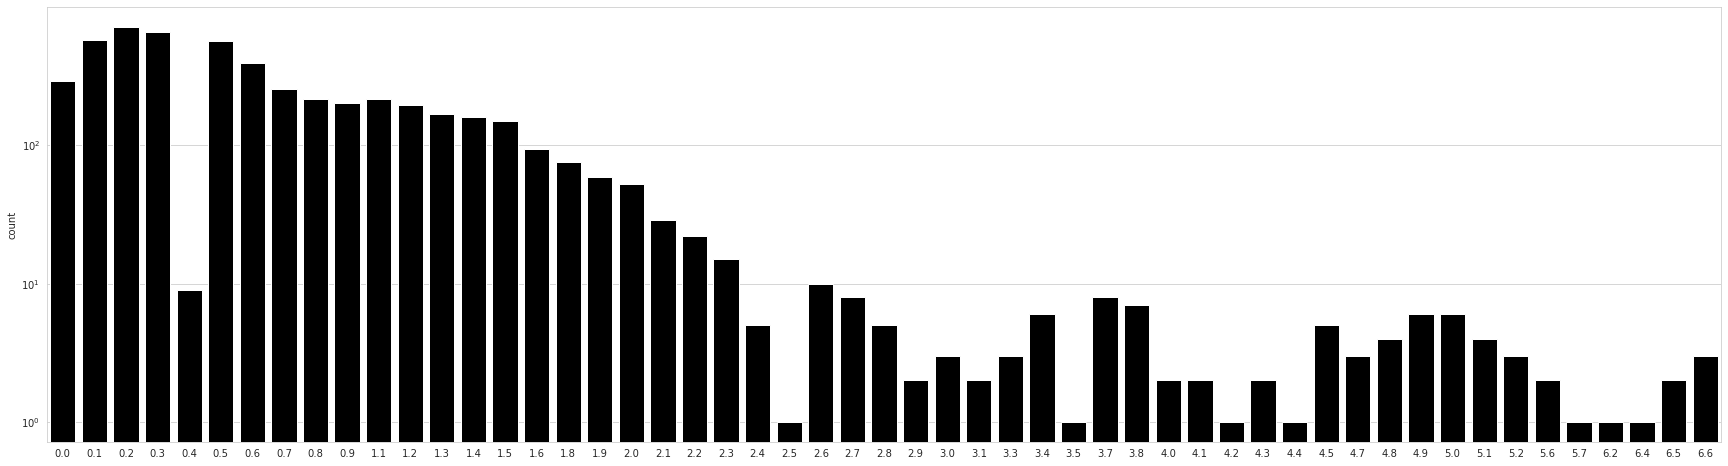

In [12]:
from matplotlib import rcParams
sns.set_style("whitegrid")
rcParams['figure.figsize'] = 30,8
sns.countplot(sorted(list(AluDict3.values())), log=True, color='black')

In [13]:
rb_df2['Divergence']=0.0
for x in rb_df2.index:
    if x in AluDict3.keys():
        rb_df2.at[x,'Divergence']=AluDict3[x]
    else:
        rb_df2.at[x,'Divergence']=100.0
rb_df2

,RepeatBlock,Lengths,Group,Block_Size,KMode_cluster,Divergence
Alu,,,,,,
C_AluY_27648628-27648919,0,2217,['42438 373 24.1 3.6 3.7 chrY.01-24.01.PAR1-PA...,2000-2999,#FF033E,2.1
C_AluY_27651050-27651338,0,2411,['42441 411 24.3 3.9 3.7 chrY.01-24.01.PAR1-PA...,2000-2999,#FF033E,2.3
C_AluY_27653465-27653756,0,2411,['42444 407 24.3 3.9 3.8 chrY.01-24.01.PAR1-PA...,2000-2999,#FF033E,2.6
C_AluY_27655874-27656161,0,2402,['42447 379 26.9 2.9 3.9 chrY.01-24.01.PAR1-PA...,2000-2999,#FF033E,2.1
C_AluY_27658288-27658576,0,2404,['42450 358 20.7 8.6 3.0 chrY.01-24.01.PAR1-PA...,2000-2999,#FF033E,2.8
...,...,...,...,...,...,...
+_AluSx_58564972-58565300,41,551,['67980 2114 13.0 0.7 0.0 chrY.01-24.01.PAR1-P...,<999,GraveYard,100.0
+_AluJb_58566428-58566578,41,1012,['67982 18 21.8 0.0 0.0 chrY.01-24.01.PAR1-PAR...,1000-1999,GraveYard,100.0
+_AluSp_58566579-58566876,41,298,['67984 2101 12.8 0.7 0.3 chrY.01-24.01.PAR1-P...,<999,GraveYard,100.0


In [14]:
#rb_df2.to_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG00358/rb_df_Divergence.csv")

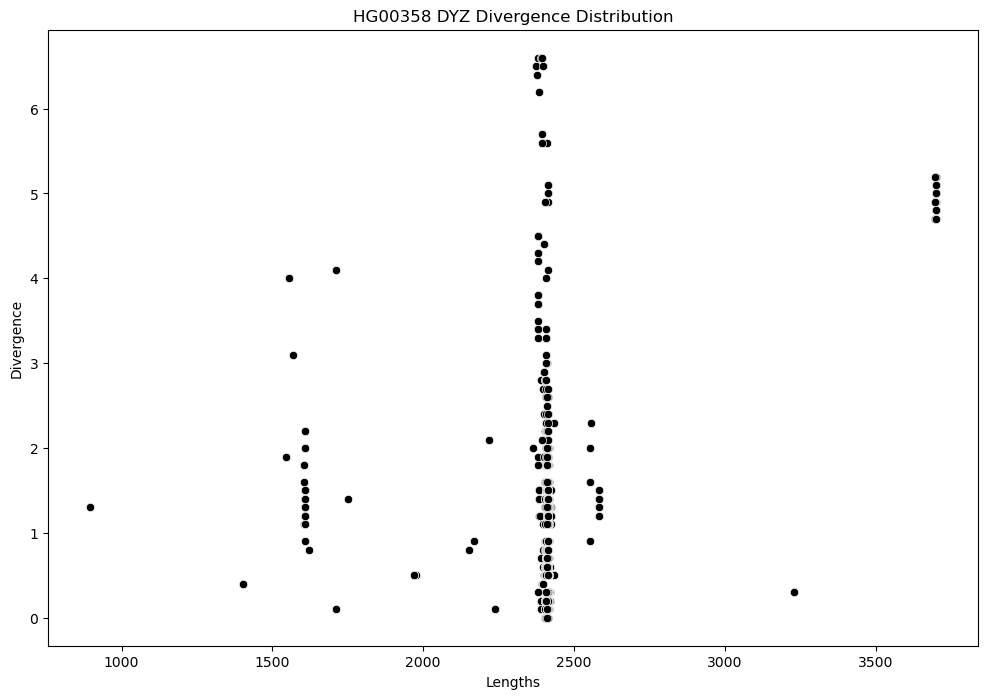

In [62]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 12,8
plt.title("HG00358 DYZ Divergence Distribution")
sns.scatterplot(x=rb_df2[(rb_df2['Divergence']!=100.0) & (rb_df2['KMode_cluster']!='GraveYard')]['Lengths'], y=rb_df2[(rb_df2['Divergence']<10.0) & (rb_df2['KMode_cluster']!='GraveYard')]['Divergence'], color='black')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG00358/HG00358_final_Divergence_Dots.pdf", dpi=300, bbox_inches='tight')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG00358/HG00358_final_Divergence_Dots.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [63]:
palette = {x:'temp' for x in set(rb_df2['Block_Size'])}
palette['1000-1999'] = 'Blue'
palette['2000-2999'] = 'Green'
palette['3000-3999'] = 'Red'
palette['<999'] = 'cyan'

[<matplotlib.collections.PathCollection object at 0x7f8f6dd77460>, <matplotlib.collections.PathCollection object at 0x7f8f6dbdb550>, <matplotlib.collections.PathCollection object at 0x7f8f6dc515e0>, <matplotlib.collections.PathCollection object at 0x7f8f6dbf7160>]
['2000-2999', '1000-1999', '<999', '3000-3999']


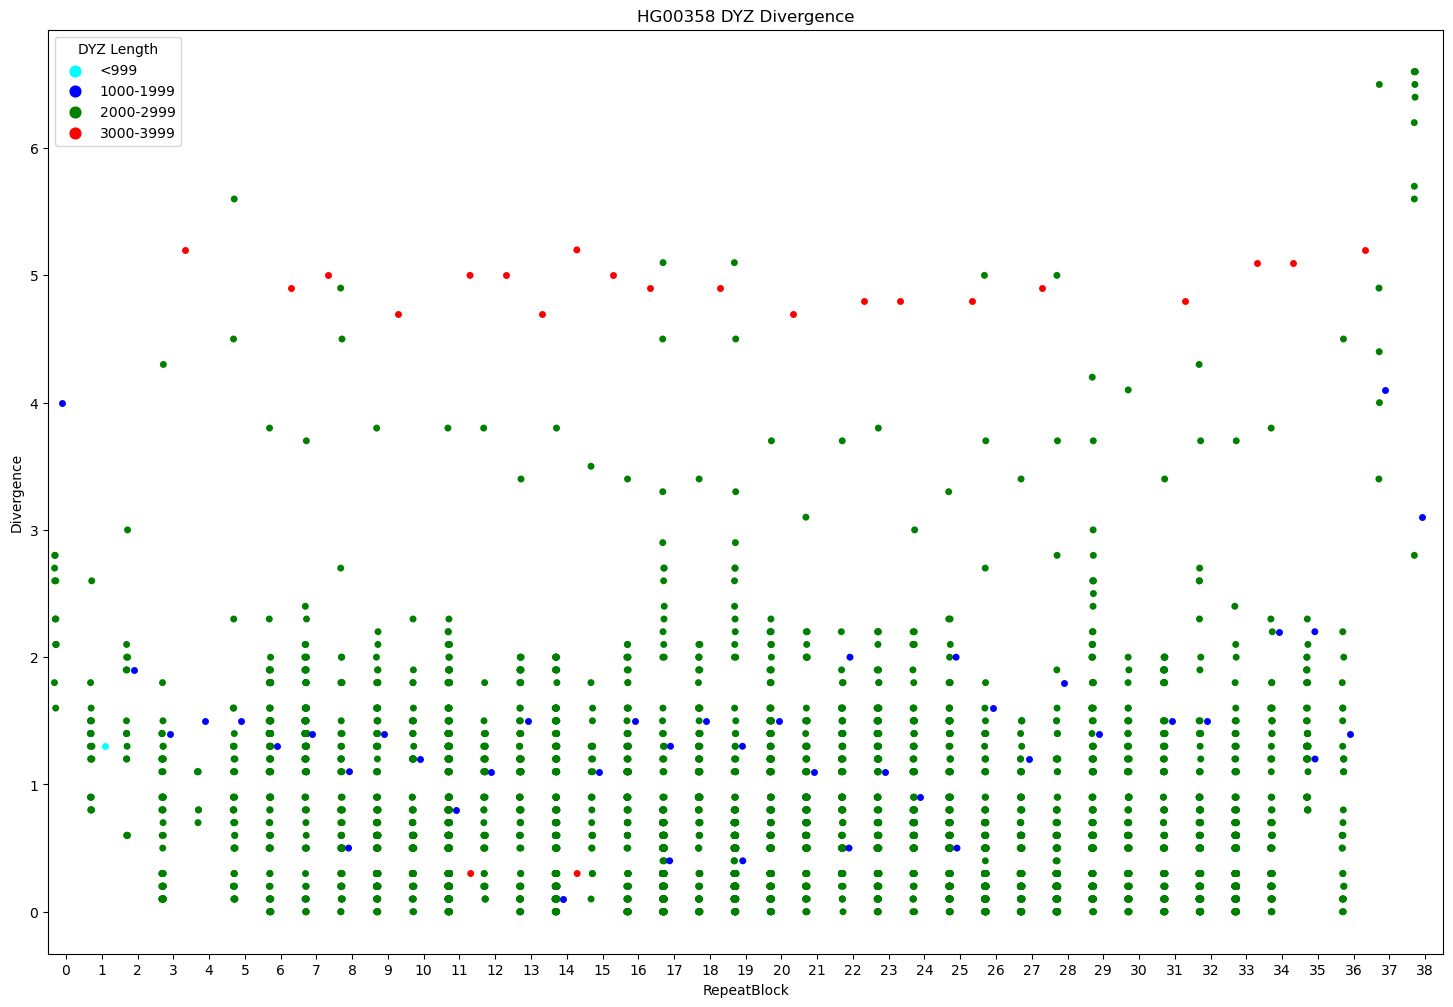

In [65]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 18,12
plt.title("HG00358 DYZ Divergence")
ax=sns.stripplot(x="RepeatBlock", y="Divergence", data=rb_df2[rb_df2['Divergence']!=100.0], dodge=True, hue='Block_Size' , palette=palette)
handles, labels = plt.gca().get_legend_handles_labels()
print(handles)
print(labels)
order = [2,1,0,3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title='DYZ Length')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG00358/HG00358_final_AluSubblock_Dots.pdf", dpi=300, bbox_inches='tight')
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HG00358/HG00358_final_AluSubblock_Dots.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [18]:
for key in AluDict2.keys():
    
    if float(rb_df2.at[key,'Divergence']) == 0.0:
        AluDict[key]='lightgrey'
                
    elif float(rb_df2.at[key,'Divergence']) > 0.0 and float(rb_df2.at[key,'Divergence']) <= 1.0:
        AluDict[key]='#538083' # Steel Teal
    
    elif float(rb_df2.at[key,'Divergence']) > 1.0 and float(rb_df2.at[key,'Divergence']) <= 2.0 :
        AluDict[key]='#2A7F62' #Spanish Viridian

    elif float(rb_df2.at[key,'Divergence']) > 2.0 and float(rb_df2.at[key,'Divergence']) <= 4.0 :
        AluDict[key]='#861657' #Pansy Purple
        
    elif float(rb_df2.at[key,'Divergence']) > 4.0 and float(rb_df2.at[key,'Divergence']) <=6.0 :
        AluDict[key]='#E1CE7A' #Flax
        
    elif float(rb_df2.at[key,'Divergence']) > 6.0 and float(rb_df2.at[key,'Divergence']) <=8.0 :
        AluDict[key]='#F06543' #orange soda

    elif float(rb_df2.at[key,'Divergence']) > 8.0 and float(rb_df2.at[key,'Divergence']) <100.0:
        AluDict[key]='#FF1053' #Radical Red

    else:
        print(key)
        AluDict[key]='black'

In [19]:
import collections
collections.Counter(AluDict.values())

Counter({'#861657': 130,
         '#2A7F62': 1169,
         '#538083': 3594,
         '#E1CE7A': 40,
         'lightgrey': 290,
         '#FF1053': 3,
         '#F06543': 7,
         'black': 63})

## Drawing Blocks

In [20]:
import turtle

In [21]:
turtle.position()
turtle.color('black')
turtle.speed(0)
flag=1
groupFlag = 0
groupNames = sorted(set(rb_df2['RepeatBlock']))
lengthFlag = 0

startPosition = turtle.position()
turtle.color("white")
turtle.setposition(turtle.pos()[0], turtle.pos()[1]+300)
turtle.color("black")
turtle.write("HG00358 Yq Heterochromatin Repeat Blocks", align="Left")
turtle.color("white")
turtle.setposition(startPosition)

for key in tqdm(sorted(set(rb_df2['RepeatBlock']))):
    
    totalAlus = len(rb_df2[rb_df2['RepeatBlock']==key])
        
    turtle.color("black")
    turtle.forward(50)
    currentPosition = turtle.position()

    currentPosition = turtle.position()
    
    if (flag % 2) == 0:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]-200)
    else:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]+200)
        
    turtle.write(" Repeat Block: "+str(key), align="left")

    turtle.setposition(currentPosition)
    

    groupFlag+=1
    lengthFlag+=1
    flag+=1
    
    for item in list(rb_df2[rb_df2['RepeatBlock']==key].index):
        
        if 'C_' in item:
            turtle.color(AluDict[item])
            turtle.forward(.5)
            turtle.right(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.left(90)
            turtle.forward(1)
            turtle.left(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.right(90)
            turtle.forward(.5)

        
        elif '+_' in item:
            turtle.color(AluDict[item])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(int(rb_df2.at[item,'Lengths'])/20)
            turtle.left(90)
            turtle.forward(.5)

        
        else:
            turtle.color('black')
            turtle.forward(.5)


100%|███████████████████████████████████████████| 42/42 [10:41<00:00, 15.28s/it]


In [22]:
from PIL import Image

In [23]:
def save_as_png(canvas,fileName):
    # save postscipt image 
    canvas.postscript(file = fileName + '.eps') 
    # use PIL to convert to PNG 
    img = Image.open(fileName + '.eps') 
    img.save(fileName + '.png', 'png') 

In [24]:
ts = turtle.getscreen()
save_as_png(ts.getcanvas(),"/home/mark/Desktop/chromosome_y/Images/HG00358/HG00358_RM_DYZ_Divergence")

In [25]:
turtle.bye()